In [0]:
#@title Default title text
Groupe 1 : Arnaud, Jean-Baptiste, Williams, Pierre-Marie

Ce premier projet porte sur l’analyse d’un jeu de données sur les passagers du titanic. Vous utiliserez le
dataset suivant : titanic_train transmis en annexe. Ci-bas, la description des variables disponibles:
⬩ Survival - Survival (0 = No; 1 = Yes).
⬩ Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
⬩ Name - Name
⬩ Sex - Sex
⬩ Age - Age
⬩ Sibsp - Number of Siblings/Spouses Aboard
⬩ Parch - Number of Parents/Children Aboard
⬩ Ticket - Ticket Number
⬩ Fare - Passenger Fare
⬩ Cabin - Cabin
⬩ Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
Les objectifs de ce projet sont :
⬩ Apprendre à analyser des données réelles
⬩ Générer des visualisations pertinentes
⬩ Traiter des données manquantes
⬩ Sélectionner des variables
⬩ Créer de nouvelles variables
⬩ Préparer un jeu de données pour la création d’un modèle prédictif

In [ ]:
# 2. Import Data & Python Packages
# 2.1. Importer les librairies utiles.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [ ]:
#2.2.Importer le jeu de données à partir du fichier CSV.
titanic_df = pd.read_csv('Titanic.csv', sep=',')

# Nouvelle section

In [12]:
# 2.3. Afficher les 10 premières lignes du dataframe.
titanic_df.head(10)
# La 1è ligne contient le nom des colonnes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
# 2.4. Afficher les dimensions du dataframe.
print('Le dataframe titanic a {} lignes et colonnes'.format(titanic_df.shape))

Le dataframe titanic a (891, 12) lignes et colonnes


In [0]:
# 2.5. Afficher les colonnes du dataframe.
print('Les colonnes de titanic sont',titanic_df.columns)

Les colonnes de titanic sont Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [0]:
# 2.6. Afficher le type des variables disponibles
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [245]:
# 2.7. Synthétiser les informations obtenues.
'''le dataframe contient les informations sur 891 passagers du Titanic.
il y a 12 informations par passager réparties sur 12 colonnes.
il y a des informations de type int/float et d'autre de type object
il y a 687 donné manquantes sur les cabines, 2 sur les membres embarqués et 177 personnes n'ont pas leur âge renseigné.
'''
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# 3. Data Quality & Missing Value Assessment

# 3.1. Afficher le nombre de données manquantes par colonne.
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
#3.2.1. Calculer le pourcentage de données manquantes pour la variable Age.
pourcentate=100*titanic_df.Age.isnull().sum()/len(titanic_df.Age)
print(pourcentate)

19.865319865319865


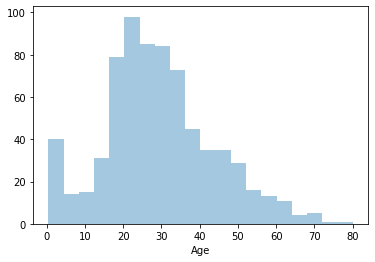

In [0]:
# 3.2.2. Représenter l'âge des passagers sous forme d’un histogramme 20 bins.

sns.distplot(titanic_df.Age,kde=False,bins=20)

In [0]:
# 3.2.3. Calculer la moyenne et la médiane de l’âge des passagers.
print('Age moyenne=',titanic_df.Age.mean(),'\t médiane=',titanic_df.Age.median())

Age moyenne= 29.69911764705882 	 médiane= 28.0


In [247]:
# 3.2.4. Remplacer les données manquantes par l’une de ces deux quantités. Justifier.
titanic_df.Age.fillna(titanic_df.Age.median())
#Les données manquantes sont remplacées par la médiane car cela affectera moins la distribution

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [0]:
# 3.3.1. Calculer le pourcentage de données manquantes pour la variable Cabin . Que constatez-vous?
100*titanic_df.Cabin.isnull().sum()/len(titanic_df.Cabin)
# beaucoup plus de données manquantes pour Cabin que pour Age

77.10437710437711

In [0]:
# 3.3.2. Afficher les valeurs uniques de la variable.
pd.unique(titanic_df.Cabin)

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [0]:
# 3.3.3. Faîtes le choix de supprimer ou conserver cette colonne. Justifier.
# On ne conserve pas les données car  ils y a beaucoup  de données manquante plus de 50%  de valeurs  manquantes   

In [252]:
# 3.4.Embarked - Missing Values

# 3.4.1. Calculer le pourcentage de données manquantes pour la variable Embarked.
100*titanic_df.Embarked.isnull().sum()/len(titanic_df.Embarked)

0.2244668911335578

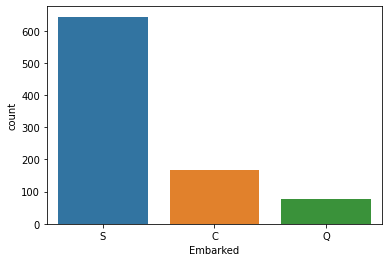

In [253]:
# 3.4.2. Représentez par un graphique la donnée Embarked .
sns.countplot('Embarked', data=titanic_df)
plt.show()

In [0]:
# 3.4.3. Quelle est la catégorie la plus représentée?
# la categorie est appellée S

In [0]:
#3.4.4. Remplacer les données manquantes par le mode de la variable Embarked.
titanic_df.Embarked.fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

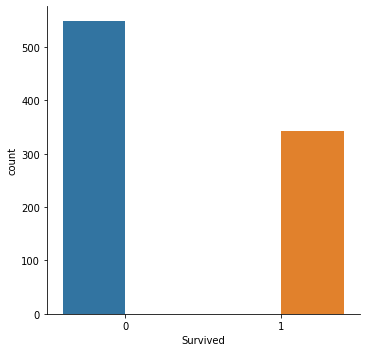

In [0]:
# 4.1Exploratory Data Analysis 
sns.catplot(x='Survived',kind='count', hue='Survived',data=titanic_df)
plt.show()

#il a plus plus de personnes mortes que vivantes.

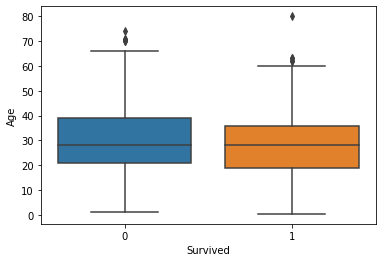

In [0]:
# 4.2. Exploration of Age
sns.boxplot('Survived','Age',data=titanic_df)
plt.show()
#on voir que la tranche d'age 25 - 40 ans est plus touché par la mort. les plus jeunes ont plus survécus à l'accident.

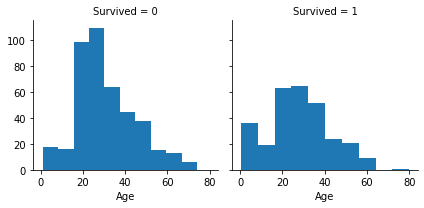

In [0]:
sns.FacetGrid(data=titanic_df,col='Survived').map(plt.hist,'Age')
plt.show()

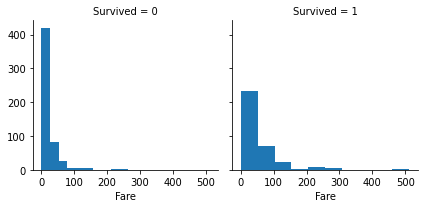

In [0]:
sns.FacetGrid(data=titanic_df,col='Survived').map(plt.hist,'Fare')
plt.show()

#ceux qui ont payé le moins cher sont les tranches les plus touchés par la mort.

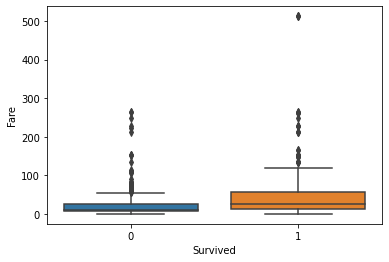

In [0]:
# 4.2. Exploration of Age
sns.boxplot('Survived','Fare',data=titanic_df)
plt.show()

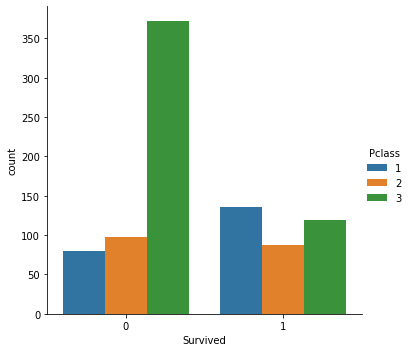

In [0]:
# 4.3. Exploration of Pclass
sns.catplot(x = 'Survived',kind ='count', hue='Pclass', data=titanic_df)
plt.show()

# les gens de la 3è classe sont le plus mort

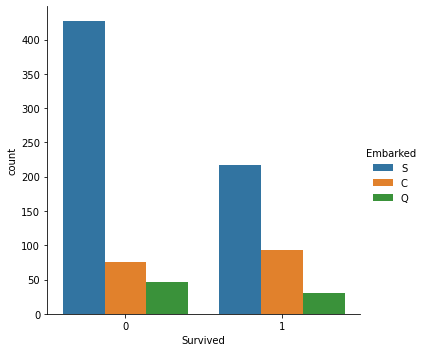

In [0]:
# 4.5. Exploration of Embarked
sns.catplot(x = 'Survived',kind ='count', hue='Embarked', data=titanic_df)
plt.show()

# il y a plus de gens embarqués au 1 point d'embarquement qui sont mort.

In [13]:
# 5. Feature Engineering
# 5.1. Créer une variable TravelF, ajoutée au dataframe, 
#à partir des variables SibSp et Parch, qui compte le nombre des membres de la famille.
titanic_df['TravelF']=titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['TravelF']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: TravelF, Length: 891, dtype: int64

In [14]:
# 5.2 Créer une variable TravelAlone, ajoutée au dataframe, à partir de TravelF qui vaut 1 si
#l’individu voyage seul et 0 sinon (en famille).
titanic_df['TravelAlone'] = np.where(titanic_df['TravelF'] == 0, 1, 0)
titanic_df['TravelAlone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: TravelAlone, Length: 891, dtype: int32

In [335]:
# 5.3. A l’aide d’une expression régulière, 
# Créer une variable Title contenant uniquement 
# le titre présent dans la variable Name (Mrs, Dr, Mr etc..)

# import re
# Title = [re.split("\s", i, 2)[1] for i in titanic_df.Name]
# Title = titanic_df.Name.str.extract(("\s", i, 2)[1])
Title = [i.split(' ')[1] for i in titanic_df.Name]
Title

['Mr.',
 'Mrs.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mrs.',
 'Miss.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Master.',
 'Mr.',
 'Planke,',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Don.',
 'Mrs.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Planke,',
 'Miss.',
 'Mrs.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mrs.',
 'Master.',
 'Mr.',
 'Mrs.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Master.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Master.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mrs.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Mr.',
 'Miss.',
 'Mr.',
 'Miss.',
 

In [266]:
# 5.4. Supprimer les colonnes dont vous n’avez plus l’utilité. 
titanic_df.drop(columns=["Cabin","SibSp", "Parch",'TravelF'])

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,1


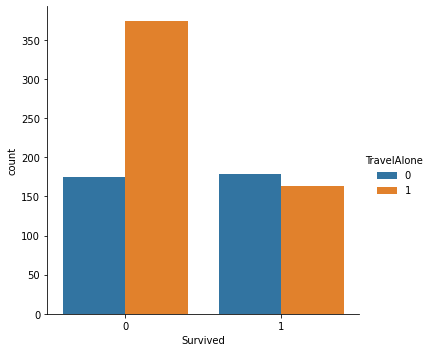

In [268]:
#5.5. Représenter la variable TravelAlone en fonction de la variable Survived.
sns.catplot(x = 'Survived',kind ='count', hue='TravelAlone', data=titanic_df)
plt.show()


In [0]:
# 6. Features encoding

# 6.1. Créer une copie du dataframe appelé df2.
import copy
df2 = copy.deepcopy(titanic_df)

In [276]:
#6.2 A l’aide de la fonction get_dummies, transformez les variables Pclass, Sex et Embarked en dummies sur le premier dataframe. Définir ce qu’est une variables dummy.
Sex = pd.get_dummies(titanic_df.Sex)
Pclass =  pd.get_dummies(titanic_df.Pclass)
Embarked =  pd.get_dummies(titanic_df.Embarked)
print('Dummies Sex, Pclass, Embarked \n',Sex,'\n',Pclass,'\n',Embarked)
# Prend une valeur entière suivant la catégorie

Dummies Sex, Pclass, Embarked 
      female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns] 
      1  2  3
0    0  0  1
1    1  0  0
2    0  0  1
3    1  0  0
4    0  0  1
..  .. .. ..
886  0  1  0
887  1  0  0
888  0  0  1
889  1  0  0
890  0  0  1

[891 rows x 3 columns] 
      C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]


In [0]:
#6.3 Affichez les 10 premières lignes du premier dataframe.
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelF,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


In [0]:
# 6.4. Importer la librairie preprocessing de sklearn.

from sklearn import preprocessing as skp

In [0]:
# 6.5. A l’aide de la fonction LabelEncoder, transformez les variables Embarked et Sex de df2 en variables catégorielles numériques.

skp.LabelEncoder.fit(df2['Embarked'],df2['Sex'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [0]:
# 6.6. Afficher les 10 premières lignes de df2.

df2.head(10)

,TravelH,TravelG,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelF
0,1,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,0,0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,0,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,0,0,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,0,0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,4,4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,2,2,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,1,1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
